<a href="https://colab.research.google.com/github/REICHIYAN/REI/blob/master/Suport%26Resistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


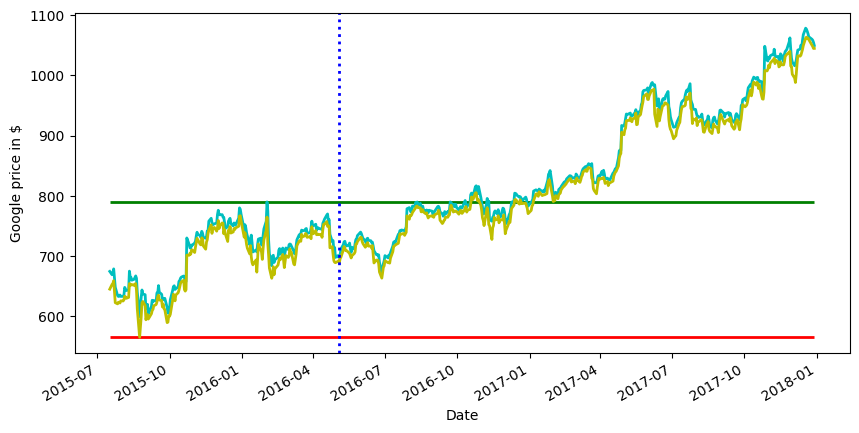

In [1]:
import pandas as pd
from pandas_datareader import data

start_date = '2010-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME='google_data.pkl'

try:
  goog_data2 = pd.read_pickle(SRC_DATA_FILENAME)
except FileNotFoundError:
  goog_data2 = data.DataReader('GOOG', 'yahoo', start_date, end_date)
  goog_data2.to_pickle(SRC_DATA_FILENAME)

goog_data=goog_data2.tail(620)
lows=goog_data['Low']
highs=goog_data['High']

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5),dpi=100)
#fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')

highs.plot(ax=ax1, color='c', lw=2.)
lows.plot(ax=ax1, color='y', lw=2.)

plt.hlines(highs.head(200).max(),lows.index.values[0],lows.index.values[-1],linewidth=2,color='g')
plt.hlines(lows.head(200).min(),lows.index.values[0],lows.index.values[-1],linewidth=2,color='r')
plt.axvline(linewidth=2,color='b',x=lows.index.values[200],linestyle=':')
plt.show()

File data found...reading GOOG data


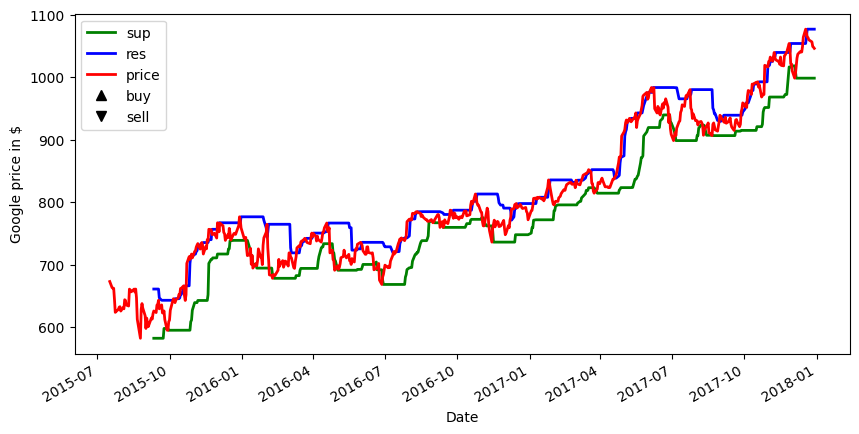

In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data

start_date = '2010-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME='google_data.pkl'

try:
  goog_data2 = pd.read_pickle(SRC_DATA_FILENAME)
  print('File data found...reading GOOG data')
except FileNotFoundError:
  print('File not found...downlosding the GOOG data')
  goog_data2 = data.DataReader('GOOG', 'yahoo', start_date, end_date)
  goog_data2.to_pickle(SRC_DATA_FILENAME)

goog_data_signal = pd.DataFrame(index=goog_data.index)
goog_data_signal['price'] = goog_data['Adj Close']

def trading_support_resistance(data, bin_width=20):
  data['sup_tolerance'] = pd.DataFrame(np.zeros(len(data)))
  data['res_tolerance'] = pd.DataFrame(np.zeros(len(data)))
  data['sup_count'] = pd.DataFrame(np.zeros(len(data)))
  data['res_count'] = pd.DataFrame(np.zeros(len(data)))
  data['sup'] = pd.DataFrame(np.zeros(len(data)))
  data['res'] = pd.DataFrame(np.zeros(len(data)))
  data['positions'] = pd.DataFrame(np.zeros(len(data)))
  data['signal'] = pd.DataFrame(np.zeros(len(data)))
  in_support=0
  in_registance=0

  for x in range((bin_width -1) + bin_width, len(data)):
    data_section = data[x - bin_width:x -1]
    support_level=min(data_section['price'])
    resistance_level=max(data_section['price'])
    range_level=resistance_level-support_level
    data['res'][x]=resistance_level
    data['sup'][x]=support_level
    data['sup_tolerance'][x]=support_level + 0.2 * range_level
    data['res_tolerance'][x]=resistance_level - 0.2 * range_level
  
    if data['price'][x]>=data['res_tolerance'][x] and data['price'][x]<=data['res'][x]:
      in_resistance+=1
      data['res_count'][x]=in_resistance
    elif data['price'][x]<=data['res_tolerance'][x] and data['price'][x]>=data['res'][x]:
      in_support+=1
      data['sup_count'][x]=in_support
    else:
      in_support=0
      in_resistance=0
    if in_registance>2:
      data['signal'][x]=1
    elif in_support>2:
      data['signal'][x]=0
    else:
      data['signal'][x]=data['signal'][x-1]
  
  data['positions']=data['signal'].diff()

trading_support_resistance(goog_data_signal)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5),dpi=100)
#fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
goog_data_signal['sup'].plot(ax=ax1, color='g', lw=2.)
goog_data_signal['res'].plot(ax=ax1, color='b', lw=2.)
goog_data_signal['price'].plot(ax=ax1, color='r', lw=2.)

ax1.plot(goog_data_signal.loc[goog_data_signal.positions==1.0].index, goog_data_signal.price[goog_data_signal.positions==1.0],'^', markersize=7, color='k', label='buy')
ax1.plot(goog_data_signal.loc[goog_data_signal.positions==-1.0].index, goog_data_signal.price[goog_data_signal.positions==-1.0],'v', markersize=7, color='k', label='sell')

plt.legend()
plt.show()